Student Performance Indicator
Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model


2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/raw.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1003, 8)

2.2 Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(1)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1002 non-null   object
 1   race_ethnicity               1002 non-null   object
 2   parental_level_of_education  1002 non-null   object
 3   lunch                        1002 non-null   object
 4   test_preparation_course      1002 non-null   object
 5   math_score                   1002 non-null   int64 
 6   reading_score                1002 non-null   int64 
 7   writing_score                1002 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.5+ KB


In [22]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [23]:
df.describe()

,math_score,reading_score,writing_score
count,1002.000000,1002.000000,1002.000000
mean,66.110778,69.202595,68.084830
std,15.155758,14.604950,15.196278
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.750000,79.000000
max,100.000000,100.000000,100.000000


In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
print("Categories in 'Gender' variable: " ,df['gender'].unique())
print("Categories in 'Race/Ethnicity' variable: " ,df['race_ethnicity'].unique())
print("Categories in 'Parental level of education' variable: " ,df['parental_level_of_education'].unique())
print("Categories in 'Lunch' variable: " ,df['lunch'].unique())
print("Categories in 'Test preparation course' variable: " ,df['test_preparation_course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'Race/Ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable:  ['standard' 'free/reduced']
Categories in 'Test preparation course' variable:  ['none' 'completed']


In [34]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
print(f"We have {len(numerical_features)} Numerical features : {numerical_features}")

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"We have {len(categorical_features)} Categorical features : {categorical_features}")

We have 3 Numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for "Total Score" and "Average"

In [55]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
math_full = (df["math_score"]==100).sum()
print(f"Number of students with full marks in Math : {math_full}")

reading_full = (df["reading_score"]==100).sum()
print(f"Number of students with full marks in Reading : {reading_full}")

writing_full = (df["writing_score"]==100).sum()
print(f"Number of students with full marks in Writing : {writing_full}")

Number of students with full marks in Math : 7
Number of students with full marks in Reading : 17
Number of students with full marks in Writing : 14


In [53]:
math_less_20 = (df["math_score"]<=20).sum()
print(f"Number of students with less than or equal to 20 marks in Math : {math_less_20}")

reading_less_20 = (df["reading_score"]<=20).sum()
print(f"Number of students with less than or equal to 20 marks in Reading : {reading_less_20}")

writing_less_20 = (df["writing_score"]<=20).sum()
print(f"Number of students with less than or equal to 20 marks in Writing : {writing_less_20}")

Number of students with less than or equal to 20 marks in Math : 4
Number of students with less than or equal to 20 marks in Reading : 1
Number of students with less than or equal to 20 marks in Writing : 3


Visualization
1. Histogram
2. Kernel Distribution Function

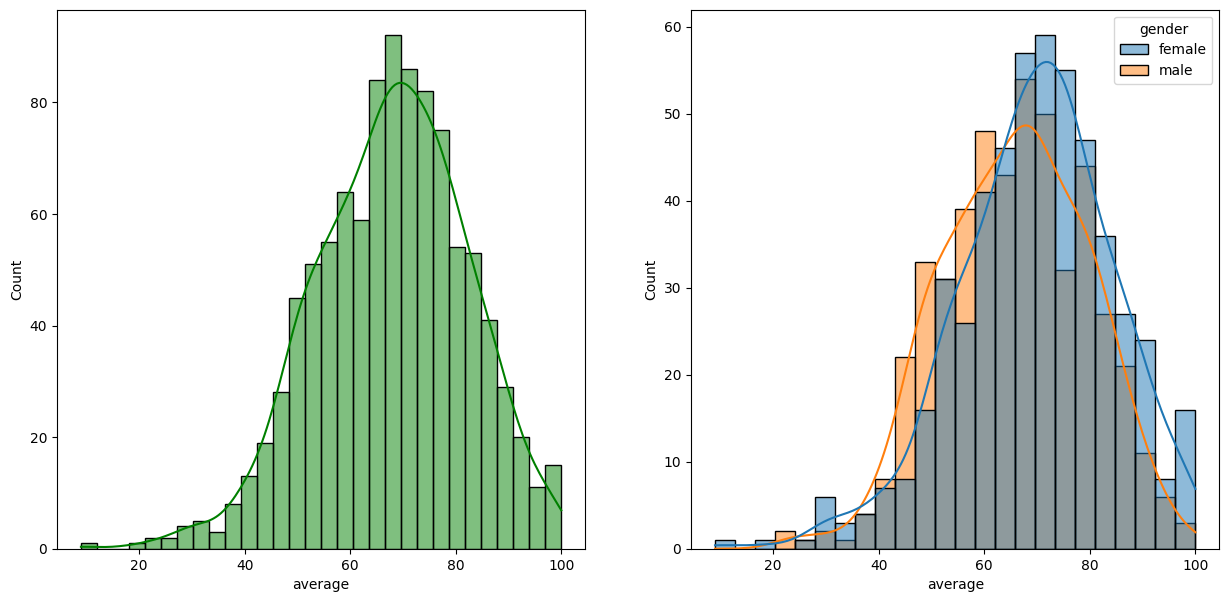

In [57]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

<Axes: xlabel='total_score', ylabel='Count'>

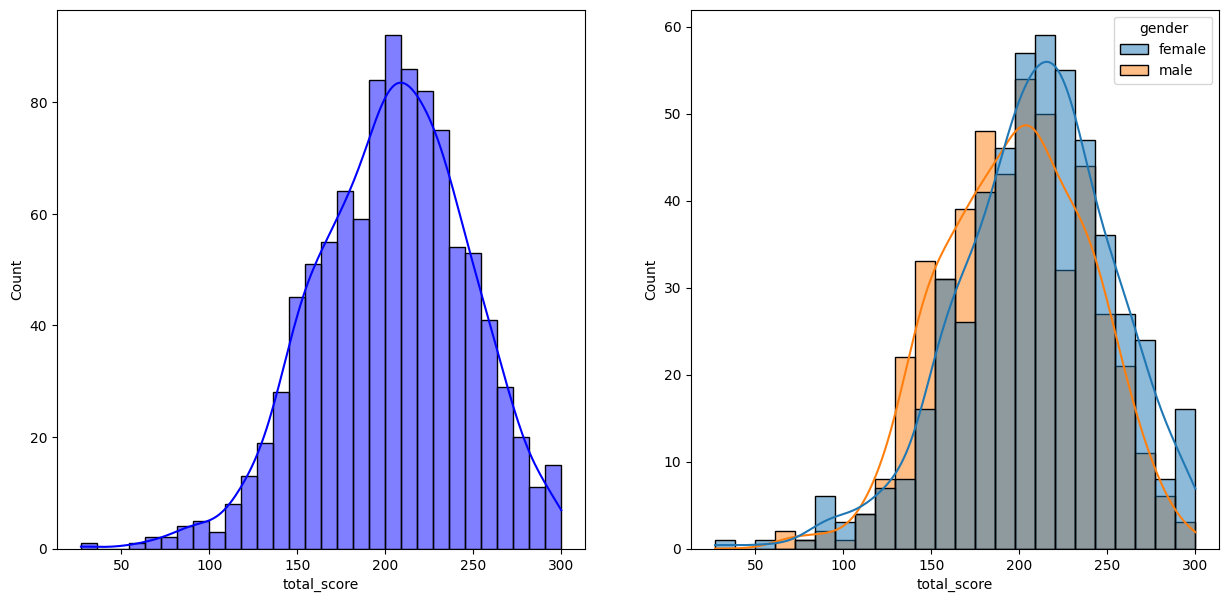

In [59]:
fig, axs = plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

<Axes: xlabel='average', ylabel='Count'>

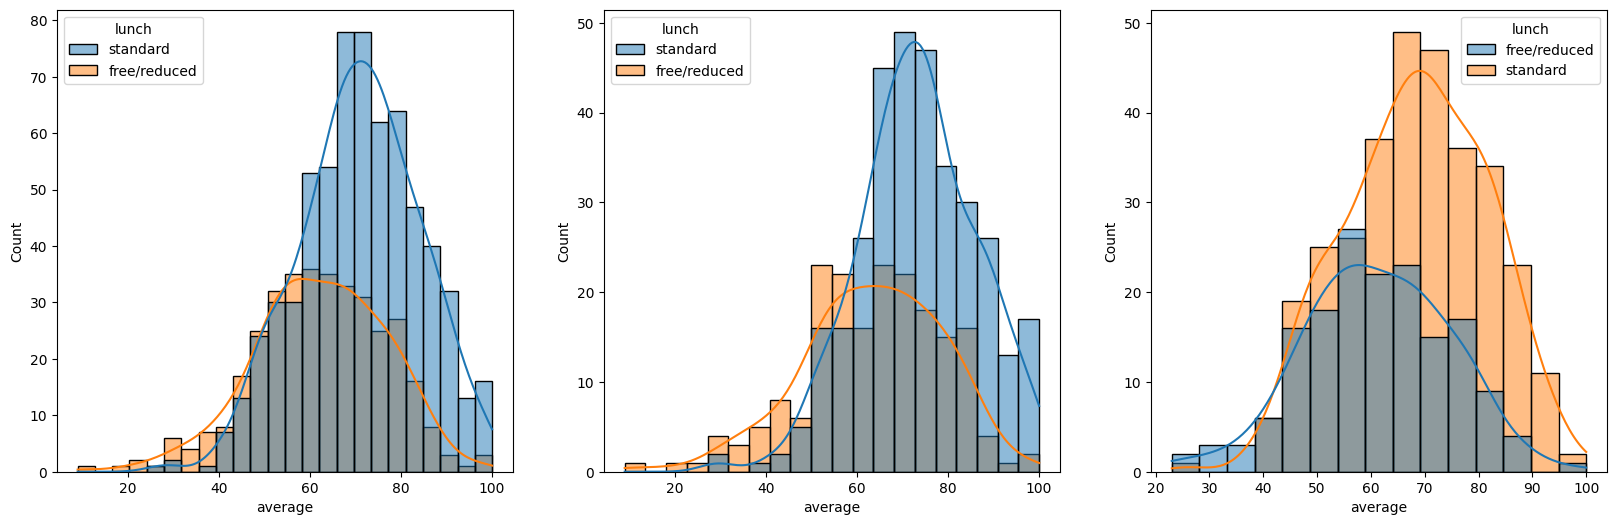

In [67]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

<Axes: xlabel='average', ylabel='Count'>

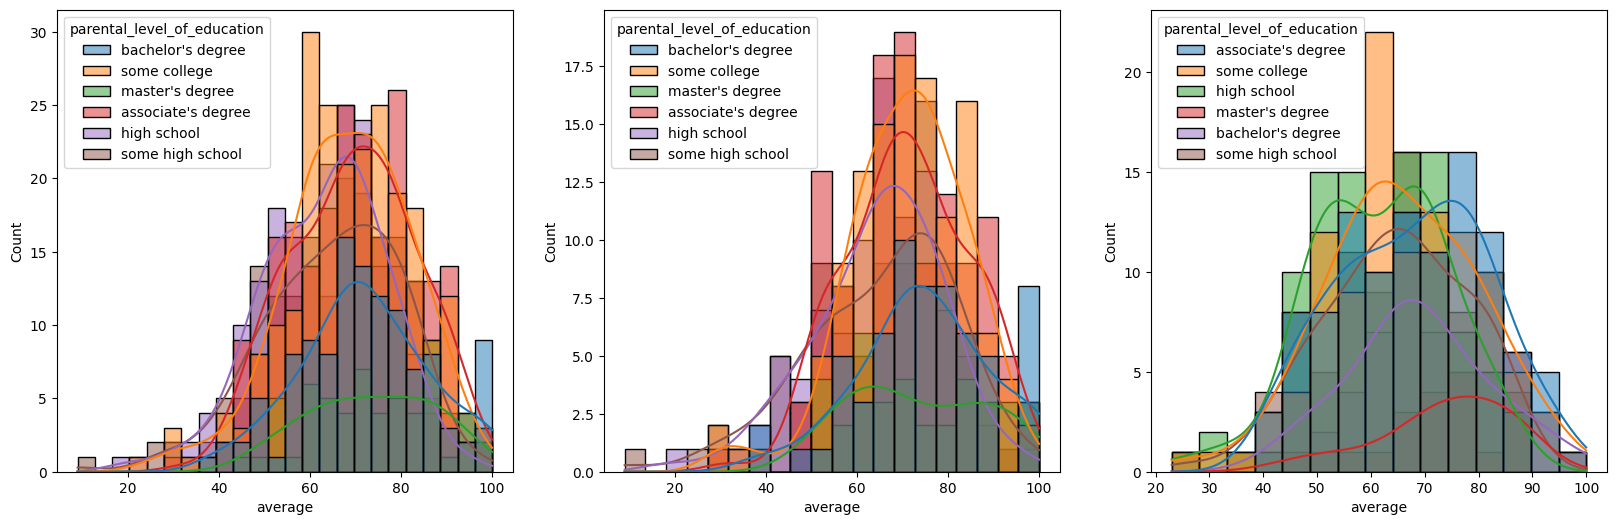

In [70]:
plt.subplots(1,3, figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

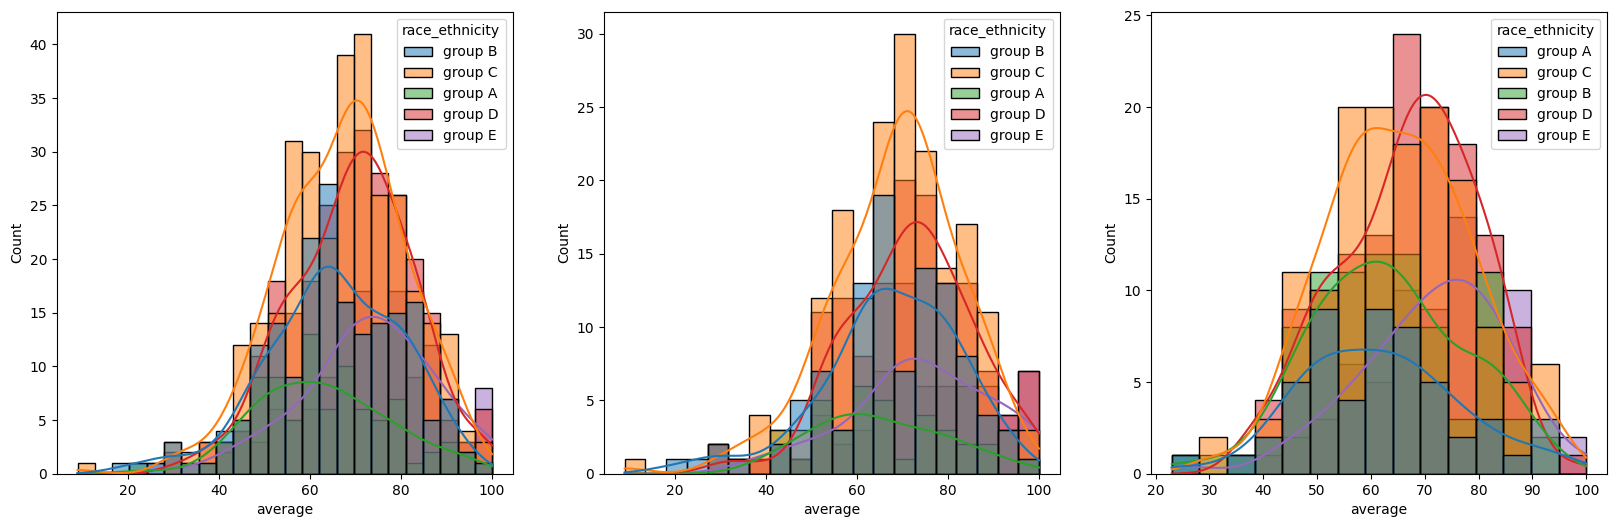

In [72]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x='average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')


Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

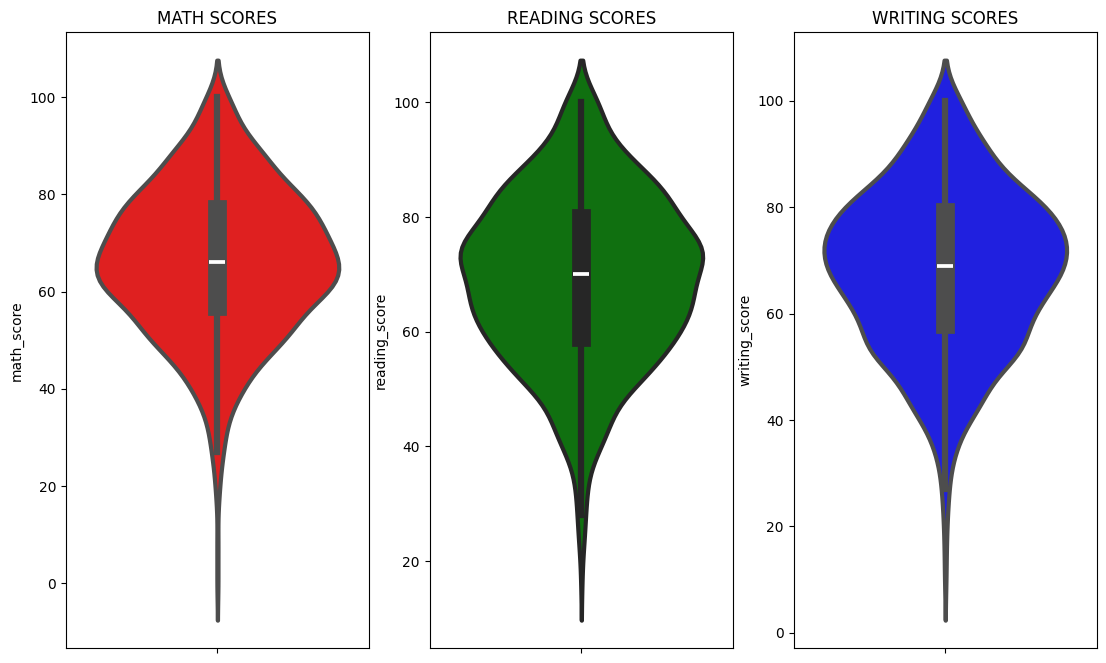

In [74]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights

From the above three plots its clearly visible that most of the students score in between 50-70 in Maths whereas in reading and writing most of them score from 50-80

<Axes: xlabel='average', ylabel='Count'>

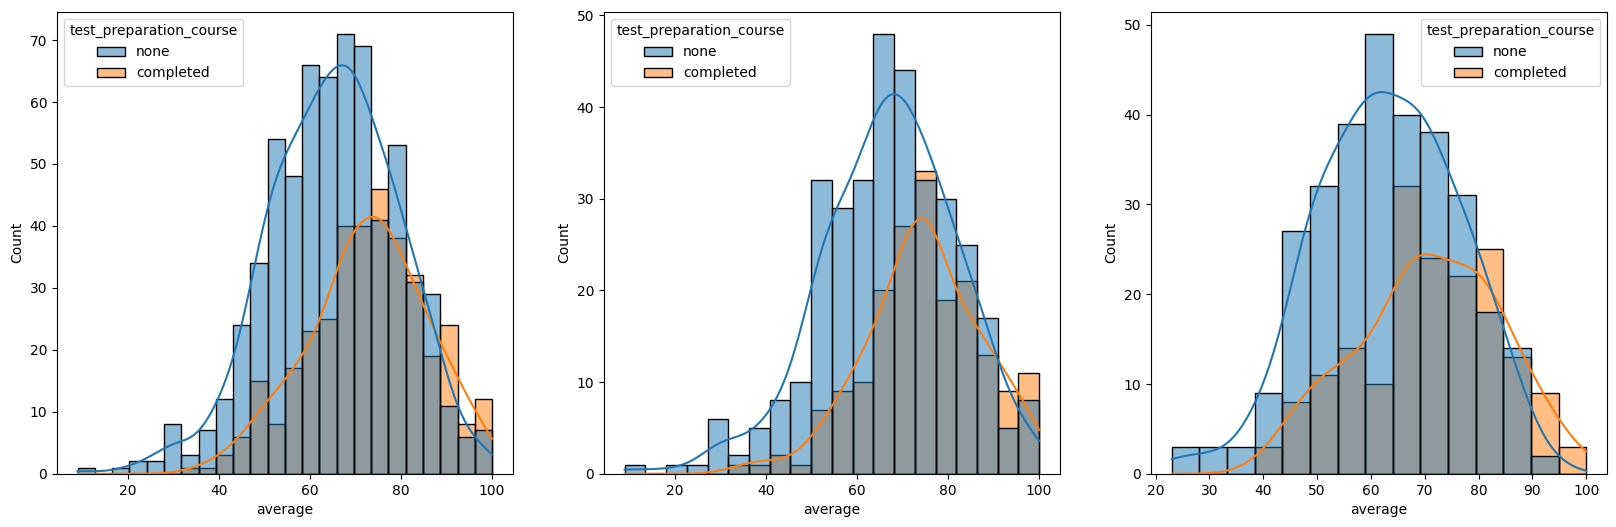

In [75]:
plt.subplots(1,3, figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x='average', kde=True, hue='test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='test_preparation_course')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

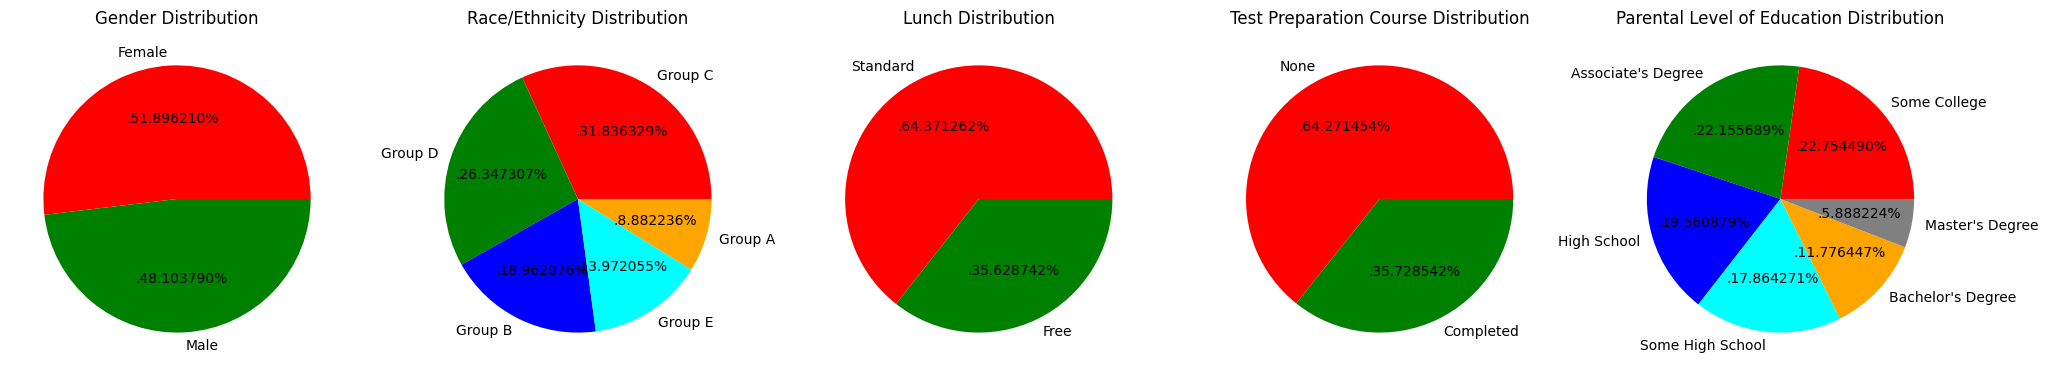

In [86]:
plt.subplots(1,5,figsize=(25,5))
plt.subplot(1, 5, 1)
size=df['gender'].value_counts()
labels = 'Female',"Male"
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Gender Distribution')
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels= 'Group C', 'Group D','Group B','Group E','Group A'
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity Distribution')
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch Distribution')
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Preparation Course Distribution')
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Level of Education Distribution')
plt.axis('off')

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

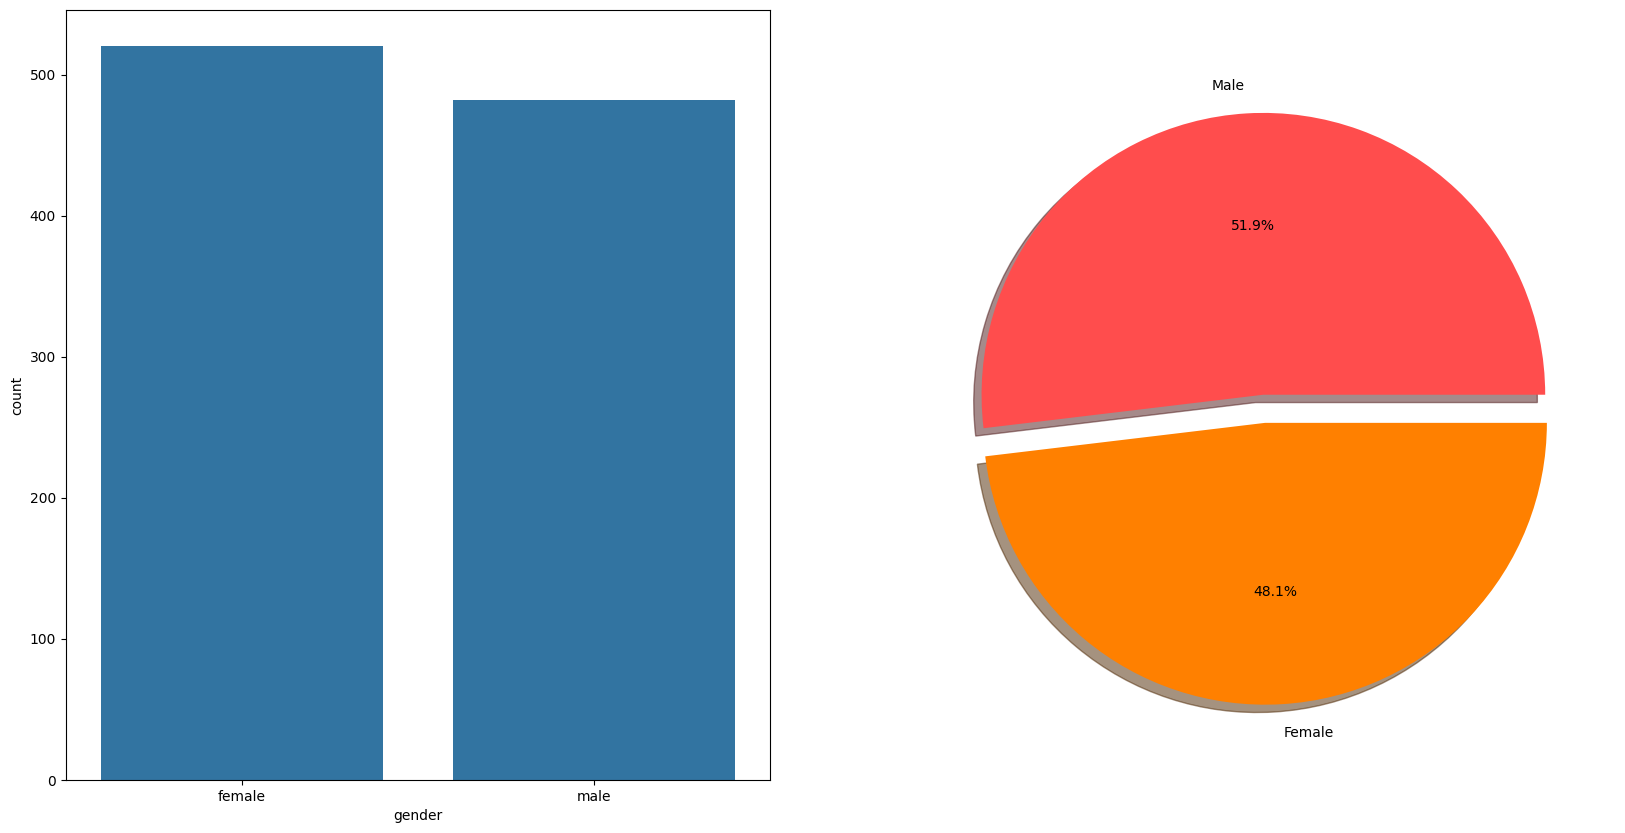

In [89]:
plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(x=df['gender'],data=df)

plt.subplot(122)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [99]:
gender_group=df.groupby("gender")[['math_score', 'reading_score', 'writing_score', 'average', 'total_score']].mean()
gender_group

,math_score,reading_score,writing_score,average,total_score
gender,,,,,
female,63.684615,72.659615,72.509615,69.617949,208.853846
male,68.728216,65.473029,63.311203,65.837483,197.512448


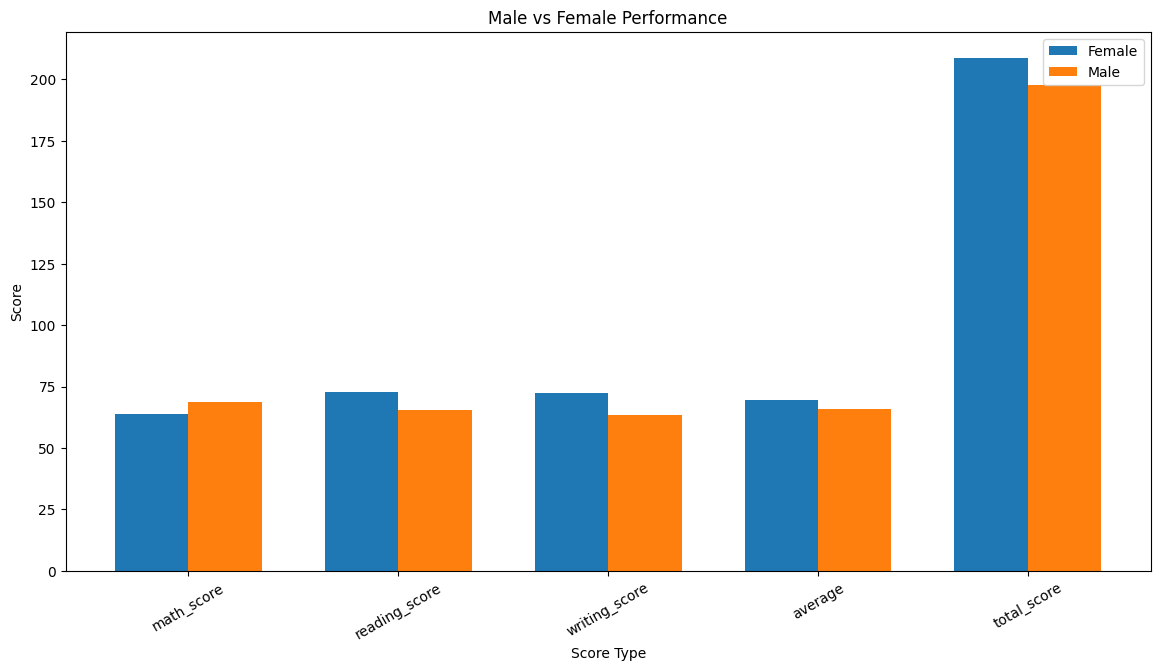

In [101]:
import numpy as np
import matplotlib.pyplot as plt

labels = gender_group.columns.tolist()   # score types
female = gender_group.loc['female'].values
male   = gender_group.loc['male'].values

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(14,7))

plt.bar(x - width/2, female, width, label='Female')
plt.bar(x + width/2, male, width, label='Male')

plt.xticks(x, labels, rotation=30)
plt.xlabel("Score Type")
plt.ylabel("Score")
plt.title("Male vs Female Performance")
plt.legend()

plt.show()


On an average females have a better overall score than men.

whereas males have scored higher in Maths.